<a href="https://colab.research.google.com/github/Samanthaavilac/Taller_2/blob/main/Taller_3_%C3%81vila_Vargas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


UNIVERSIDAD EXTERNADO DE COLOMBIA

FINANZAS COMPUTACIONALES 

Taller 3 


#Integrantes:
- María Paula Vargas (205)
- Samantha Ávila 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cp
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
!pip install --quiet yfinance
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

1. Escoja 5 acciones que hagan parte del índice Dow Jones (DJI). Con la información 
histórica de estas acciones para un periodo de al menos 5 años con periodicidad mensual y 
con cierre a Dic-2022:

  a. Estimar los parámetros del modelo de mercado de las cinco acciones y      construir un 
DataFrame donde se resuman los caculos de: retornos esperados (promedio), volatilidades, 
betas, retornos estimados (CAPM) y el coeficiente de determinación de cada uno.

  b. Construya un plano riesgo-retorno en el que se relacionen los retornos estimados del 
CAPM y las betas de los activos. 

  c. Punto opcional: estime los retornos de los cinco activos usando el modelo de FamaFrench. Compare los resultados con el modelo CAPM.

In [ ]:
acciones=('MMM','AXP','JPM','V','CAT')
indice=yf.download('^DJI',start='2017-12-01',end='2022-12-31',interval='1Mo')['Adj Close']
precios=yf.download(acciones,start='2017-12-01',end='2022-12-31', interval='1MO')['Adj Close']
retornos=np.log(precios/precios.shift()).dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  5 of 5 completed


In [ ]:
p_MMM= yf.download('MMM',start='2017-12-01',end='2022-12-31', interval='1MO')['Adj Close']
r_MMM= np.log(p_MMM/p_MMM.shift()).dropna()
retornos_esp_MMM=np.mean(r_MMM)
sigma_MMM=np.std(r_MMM)

[*********************100%***********************]  1 of 1 completed


In [ ]:
p_AXP= yf.download('AXP',start='2017-12-01',end='2022-12-31', interval='1MO')['Adj Close']
r_AXP= np.log(p_AXP/p_AXP.shift()).dropna()
retornos_esp_AXP=np.mean(r_AXP)
sigma_AXP=np.std(r_AXP)

[*********************100%***********************]  1 of 1 completed


In [ ]:
p_JPM= yf.download('JPM',start='2017-12-01',end='2022-12-31', interval='1MO')['Adj Close']
r_JPM= np.log(p_JPM/p_JPM.shift()).dropna()
retornos_esp_JPM=np.mean(r_JPM)
sigma_JPM=np.std(r_JPM)

[*********************100%***********************]  1 of 1 completed


In [ ]:
p_V= yf.download('V',start='2017-12-01',end='2022-12-31', interval='1MO')['Adj Close']
r_V= np.log(p_V/p_V.shift()).dropna()
retornos_esp_V=np.mean(r_V)
sigma_V=np.std(r_V)

[*********************100%***********************]  1 of 1 completed


In [ ]:
p_CAT= yf.download('CAT',start='2017-12-01',end='2022-12-31', interval='1MO')['Adj Close']
r_CAT= np.log(p_CAT/p_CAT.shift()).dropna()
retornos_esp_CAT=np.mean(r_CAT)
sigma_CAT=np.std(r_CAT)

[*********************100%***********************]  1 of 1 completed


In [ ]:
#DataFrame de los retornos esperados (promedio), volatilidades, betas, retornos estimados (CAPM) y el coeficiente de determinación de cada uno.
retornos_esp=np.mean(retornos)
sigma=np.std(retornos)
X=indice

Y=

CAPM=sm.OLS(Y,sm.add_constant(X)).fit()

ValueError: ignored

2. Escoja 5 acciones que hagan parte del índice Dow Jones (DJI). Con la información 
histórica de estas acciones para un periodo de al menos 5 años con periodicidad mensual y 
con cierre a Dic-2022, construya el portafolio óptimo tangente (máximo ratio de Sharpe).

a. Presentar el grafico de pesos y sus medidas de retorno esperado y volatilidad. Nota: 
tomar solo posiciones largas en el portafolio.

b. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el 
modelo estándar o paramétrico.

c. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el 
modelo de estimación histórica.

d. Utilice el método de Monte Carlo para construir una muestra aleatoria de 10.000 
portafolios. Con esta muestra aleatoria calcular el VaR de simulación del portafolio.

e. ¿Se encuentran diferencias significativas entre el VaR de simulación y el VaR de 
paramétrico?

3. Los precios de activos riesgos en el mercado describen un proceso estocástico {𝑆𝑡
}
𝑡≥0
que satisface:

𝑺𝒕 = 𝑺𝟎 𝐞𝐱𝐩{(𝝁– 𝟏/𝟐𝝈
𝟐
)𝒅𝒕 + 𝝈 𝒅𝑾𝒕
}

Donde: 𝜇 es la tasa de retorno del activo, 𝜎 es su volatilidad y 𝑊𝑡 es un proceso estándar de 
Wiener. A partir de esta expresión es posible simular el precio del activo en algún instante de 
tiempo t.

a. Escoja una acción de su preferencia. Con la información histórica con cierre a Dic-2022, 
estime los parámetros 𝜇 y 𝜎. Utilice el método de Monte Carlo para generar una muestra 
aleatoria de 10.000 posibles valores del precio del activo en el instante 𝒕 = 𝟏. Presente 
gráficamente las primeras 20 trayectorias del proceso. 
Nota: tome como 𝑆0 el precio de Dic-2022 y los parámetros estimados a partir de la muestra 
de datos.

[*********************100%***********************]  1 of 1 completed


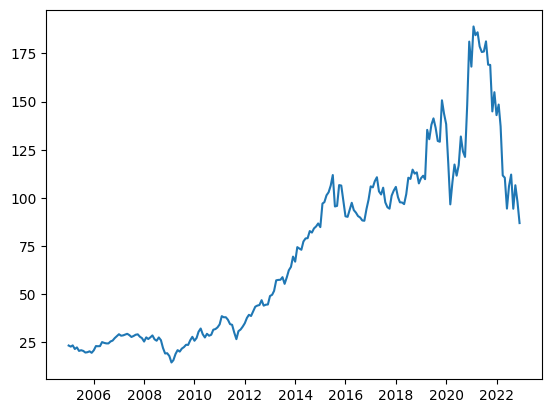

In [ ]:
activos3 = ["DIS"]
precios3 = yf.download(activos3, start ="2005-01-01", end="2022-12-31", interval="1Mo")["Adj Close"]
retornos3 = np.log(precios3/precios3.shift()).dropna()
plt.plot(precios3)

In [ ]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S

In [101]:
T = 1 # Un Año
mu = retornos.mean()*12
sigma = retornos.std()*np.sqrt(12) #Volatilidad de los retornos de la serie anualizados 
S0 = precios[-1]
NS = 10000 # convertir en un parámetro para convertir la matriz, # trayectorias
M = 12 # Partición del año en meses
St = PathsGBM(S0,mu,sigma,T,NS,M)

Text(0.5, 0, 'Tiempo')

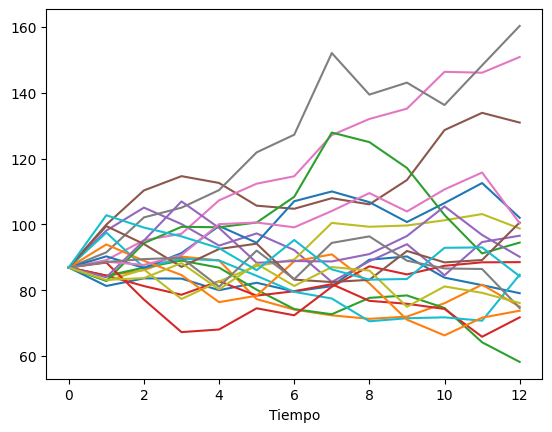

In [102]:
plt.plot(np.transpose(St[0:20,:]))
plt.xlabel("Tiempo")

b. Construya el histograma de los precios y retornos al final del periodo (𝑡 = 1). ¿qué puede 
concluir de la forma de los histogramas?

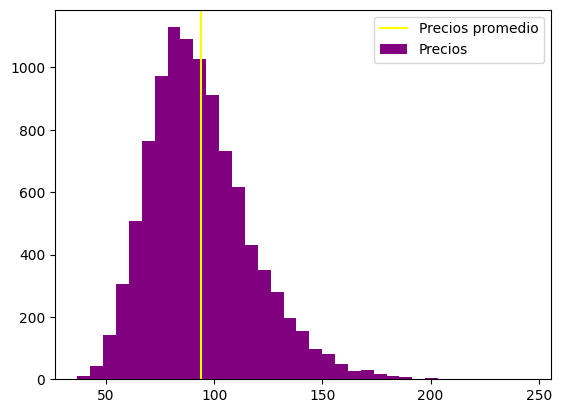

In [103]:
#Histograma precios 
plt.axvline(St[:,-1].mean(),label="Precios promedio", color="yellow")
plt.hist(St[:,-1],bins=35,label="Precios", color="purple")
plt.legend();

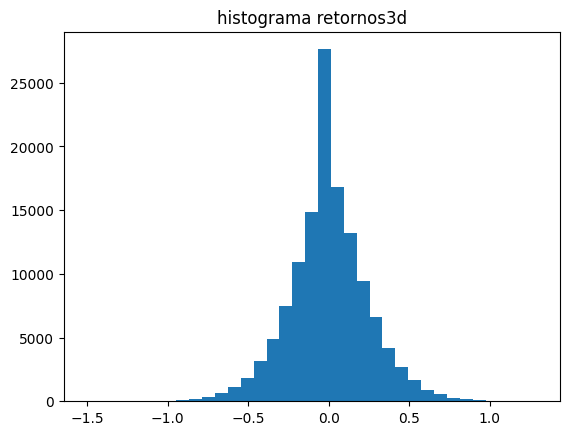

In [111]:
retornos3d = np.log(St[1:,:] / St[:-1,:])
plt.hist(retornos3d.flatten(), bins=35, label="retornos del modelo")
plt.title("histograma retornos3d")
plt.show()

c. Demuestre que el valor del precio simulado de la acción en T converge a 𝑆𝑇 exp {𝜇 𝑇}.

In [106]:
Ste=(S0*np.exp(mu*T))
valorprmodelo=St[:,-1].mean()
print(" El precio del modelo de la accion es de", valorprmodelo, "Y de ST exp{μ T} es de",Ste , "lo que indica que el precio modelado de la acción en T converge a ST exp{μ T}.")

 El precio del modelo de la accion es de 93.6694671901049 Y de ST exp{μ T} es de 93.514281894884 lo que indica que el precio modelado de la acción en T converge a ST exp{μ T}.


d. Calcule la probabilidad de que el precio de la acción sea inferior a 𝑆0.

In [107]:
#Probabilidad precio de la acción <0 
DIS=St[:,-1]
r=len(DIS[DIS<S0])/NS
print("La probabilidad de que el precio de la acción sea <0 es",r)

La probabilidad de que el precio de la acción sea <0 es 0.433


4. Un tipo de proceso estocástico asociados al movimiento Browniano y que se utilizan 
ampliamente en finanzas son los llamados procesos de reversión a la media. Dentro de 
estos se encuentra el proceso Ornstein-Uhlenbeck, que es un proceso 𝑋𝑡 que satisface:

𝑿𝒕+𝒅𝒕 = 𝑿𝒕 + (𝝁–𝑿𝒕
)𝒅𝒕 + 𝝈(𝑾𝒕+𝒅𝒕 − 𝑾𝒕)

a. Utilice el método de Monte Carlo para realizar una simulación de 10000 posibles 
trayectorias (NS) de este proceso considerando los siguientes valores: 𝑿𝟎 = 𝟏, 𝝁 = 𝟑, 𝝈 =
𝟎. 𝟑, 𝑻 = 𝟓, 𝑵𝑺 = 𝟏𝟎𝟎, 𝒅𝒕 = 𝑻/𝒎. Presente gráficamente los resultados para las primeras 
10 trayectorias del proceso.

b. A partir de los observado en las simulaciones realizadas en el punto anterior, ¿qué puede
concluir acerca del valor esperado y la varianza del proceso Ornstein-Uhlenbeck en el largo
plazo?

c. De acuerdo con la ecuación 1, ¿cuál es la distribución de probabilidad del proceso 
Ornstein-Uhlenbeck?

d. El proceso Ornstein-Uhlenbeck se suelen utilizar para modelar la dinámica de la tasa 
corta de interés. Por ejemplo, si 𝒓𝒕 denota el valor de la tasa corte de interés en el mercado, 
esta se puede modelar como:

𝒓𝒕+𝒅𝒕 = 𝒓𝒕 + (𝝁– 𝒓𝒕
)𝒅𝒕 + 𝝈(𝑾𝒕+𝒅𝒕 − 𝑾𝒕)

Teniendo en cuenta los siguientes parámetros: 𝒓𝟎 = 𝟎. 𝟎𝟑, 𝝁 = 𝟎. 𝟎𝟓, 𝝈 = 𝟎. 𝟏𝟓, 𝑻 =
𝟏, 𝑵𝑺 = 𝟏𝟎𝟎, 𝒅𝒕 = 𝑻/𝒎; simule 100 posibles valores de la tasa de corta en el instante 
𝑻 = 𝟏, y utilice el valor promedio obtenido para valorar un bono cero cupón y facial 100 con 
vencimiento en 𝑻. Presente gráficamente los resultados para las primeras 10 trayectorias del 
proceso

In [117]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S

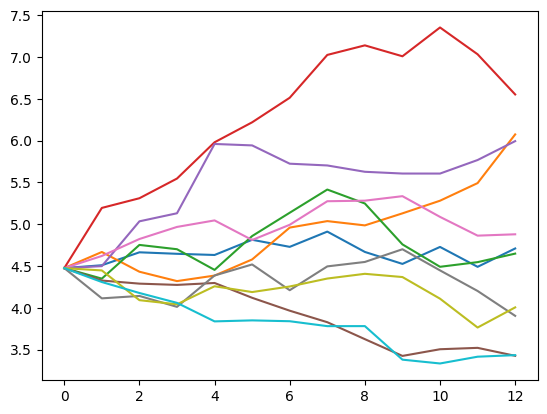

In [124]:
r0 = 0.03
mu = 0.05
sigma = 0.15
T = 1
NS = 100
m = 12
dt = T/m
St4= PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St4[0:10,:]));

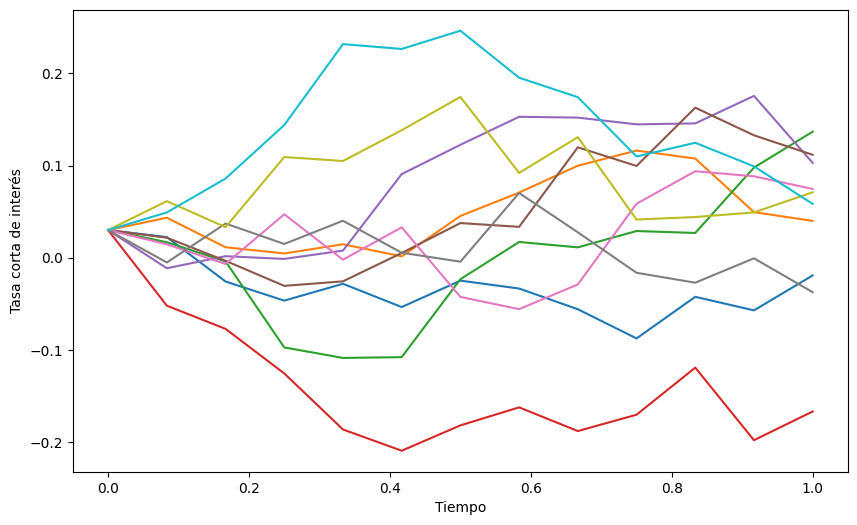

In [125]:
r = np.zeros((NS, m+1))
r[:,0] = r0
for i in range(NS):
    for j in range(m):
        r[i,j+1] = r[i,j] + (mu - r[i,j])*dt + sigma*np.random.normal()*np.sqrt(dt)
plt.figure(figsize=(10,6))
for i in range(10):
    plt.plot(np.linspace(0,T,m+1), r[i,:], label=f"Trayectoria {i+1}")
plt.xlabel("Tiempo")
plt.ylabel("Tasa corta de interés")
plt.show()

5. Escoja tres de los siguientes activos.

i. Gold futures (GC=F)

ii. Brent Oil futures (BZ=F)

iii. US Treasury Bill (^IRX)

iv. EURUSD currency (EURUSD=X)

v. GBPUSD currency (GBPUSD=X)

vi. Coffee futures (KC=F)

vii. Natural gas (NG=F)

viii. Cooper (HG=F)

Con la información de las series históricas para el periodo 2005-01-01 a 2022-12-31 con 
periodicidad mensual, construya 100 trayectorias o simulaciones para cada serie para el año 
2023. Para este ejercicio tenga en cuenta que las series pueden seguir un proceso estocástico tipo MGB o de reversión a la media tipo OU. 

La selección del proceso debe incorporar:

a. La gráfica de las series históricas de los precios 

b. Los resultados de las pruebas de estacionariedad de Dickey-Fuller (ADF)

c. Los resultados de la simulación


In [39]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S

[*********************100%***********************]  3 of 3 completed


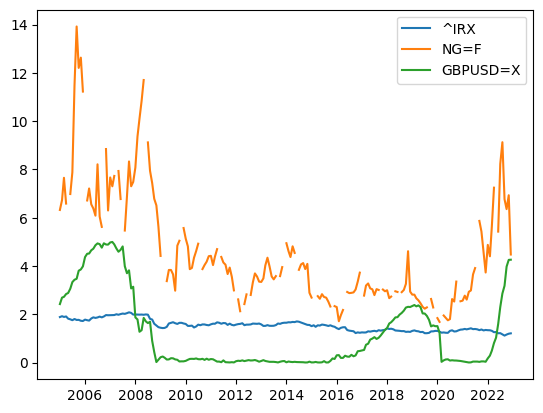

In [112]:
activos5 = ["^IRX","NG=F","GBPUSD=X"]
precios5 = yf.download(activos5, start ="2004-12-31", end="2022-12-31", interval="1Mo")["Adj Close"]
retornos5= np.log(precios5/precios5.shift()).dropna()
plt.plot(precios5)
plt.legend(activos5)

Text(0.5, 0, 'Tiempo')

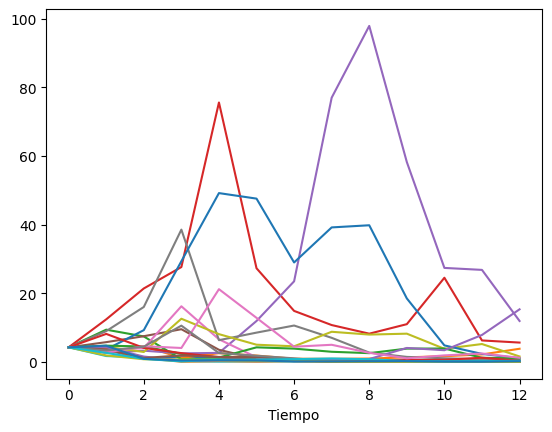

In [113]:
#Activo ^IRX
T = 1 # Un Año
mu = retornos5["^IRX"].mean()*12
sigma = retornos5["^IRX"].std()*np.sqrt(12) #Volatilidad de los retornos de la serie anualizados 
S0 = precios5["^IRX"][-1]
NS = 100  # trayectorias
M = 12 # Partición del año en días
St51= PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St51[0:21,:]))
plt.xlabel("Tiempo")

In [114]:
#Prueba estacionariedad 
pruebadf51= adfuller(precios5["^IRX"]) 
print("ADF test: %f" % pruebadf51[0])
print("P-value: %f" % pruebadf51[1])
print("Citical values:")
for key, value in pruebadf51[4].items():
  print("\t%s: %f" %(key,value))
#No estacionaria 

ADF test: -2.013092
P-value: 0.280862
Citical values:
	1%: -3.461879
	5%: -2.875404
	10%: -2.574159


Text(0.5, 0, 'Tiempo')

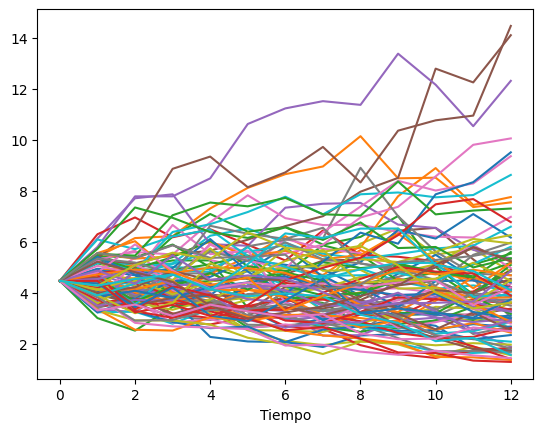

In [115]:
#Activo NG=F
T = 1 # Un Año
mu = retornos5["NG=F"].mean()*12
sigma = retornos5["NG=F"].std()*np.sqrt(12) #Volatilidad de los retornos de la serie anualizados 
S0 = precios5["NG=F"][-1]
NS = 100  # trayectorias
M = 12 # Partición del año en días
St52= PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St52))
plt.xlabel("Tiempo")

In [ ]:
#Prueba estacionariedad 
pruebadf52= adfuller(precios5["NG=F"]) 
print("ADF test: %f" % pruebadf52[0])
print("P-value: %f" % pruebadf52[1])
print("Citical values:")
for key, value in pruebadf52[4].items():
  print("\t%s: %f" %(key,value))

Text(0.5, 0, 'Tiempo')

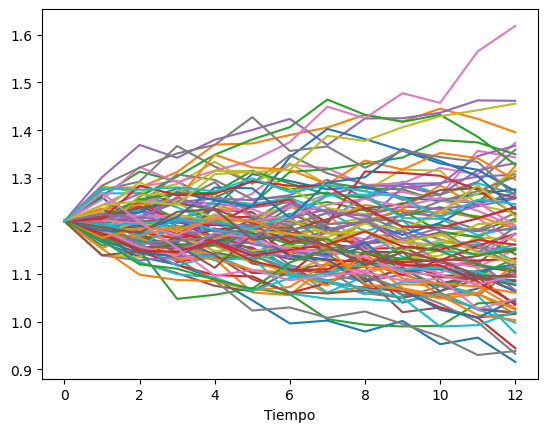

In [86]:
#Activo GBPUSD=X
T = 1 # Un Año
mu = retornos5["GBPUSD=X"].mean()*12
sigma = retornos5["GBPUSD=X"].std()*np.sqrt(12) #Volatilidad de los retornos de la serie anualizados 
S0 = precios5["GBPUSD=X"][-1]
NS = 100  # trayectorias
M = 12 # Partición del año en días
St53= PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St53))
plt.xlabel("Tiempo")

In [87]:
#Prueba estacionariedad 
pruebadf53= adfuller(precios5["GBPUSD=X"]) 
print("ADF test: %f" % pruebadf53[0])
print("P-value: %f" % pruebadf53[1])
print("Citical values:")
for key, value in pruebadf53[4].items():
  print("\t%s: %f" %(key,value))
#No estacionaria 

ADF test: -1.631676
P-value: 0.466614
Citical values:
	1%: -3.461429
	5%: -2.875207
	10%: -2.574054
